<a href="https://colab.research.google.com/github/kietbg0079/LinearRegression-Module/blob/main/HousePredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prepare Data

In [1]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
!git clone https://github.com/Despair1525/LinearRegression-Module.git

Cloning into 'LinearRegression-Module'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [3]:
df = pd.read_csv('/content/LinearRegression-Module/HousePriceinVN - HousePrice2.csv')

In [4]:
df.columns

Index(['Date', 'địa chỉ', 'mặt tiền', 'đường vào', 'số tầng', 'số phòng  ngủ',
       'số phòng toilet', 'm^2', 'price'],
      dtype='object')

In [5]:
df['Date'] = pd.to_datetime(df.Date)

In [6]:
df.sort_values(by=['Date'])

,Date,địa chỉ,mặt tiền,đường vào,số tầng,số phòng ngủ,số phòng toilet,m^2,price
1037,2021-01-10,"Đường Hòa Bình, Phường Yên Nghĩa, Hà Đông, Hà Nội",3.5,3.0,4.0,3.0,4.0,35.0,44.3 triệu/m²
1041,2021-01-10,"34, Đường An Dương Vương, Phúc Yên, Vĩnh Phúc",5.0,20.0,3.0,4.0,3.0,53.0,112.3 triệu/m²
3076,2021-01-10,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Hồ ...",NaN,NaN,3.0,4.0,5.0,84.0,148.8 triệu/m²
1042,2021-01-10,"Đường Nguyễn Văn Cừ, Phường Bồ Đề, Long Biên, ...",4.0,NaN,5.0,3.0,4.0,42.0,92.6 triệu/m²
1043,2021-01-10,"82, Đường Yên Lãng, Phường Láng Hạ, Đống Đa...",9.0,NaN,5.0,3.0,5.0,51.0,152.9 triệu/m²
...,...,...,...,...,...,...,...,...,...
1958,2021-10-10,"Đường Mễ Trì Hạ, Phường Mễ Trì, Nam Từ Liêm, H...",4.0,3.0,5.0,6.0,5.0,45.0,93.3 triệu/m²
1249,2021-10-10,"Đường Lê Quang Đạo, Nam Từ Liêm, Hà Nội.",4.0,3.0,4.0,2.0,4.0,32.0,106.2 triệu/m²
2819,2021-10-10,"Đường Yên Xá, Xã Tân Triều, Thanh Trì, Hà Nội",4.0,4.0,7.0,18.0,18.0,73.0,121.9 triệu/m²
2818,2021-10-10,"đường Trung Văn, Phường Trung Văn, Nam Từ Liêm...",6.3,2.5,6.0,14.0,14.0,50.0,158 triệu/m²


In [7]:
# loại bỏ đi data dư thừa
df=df.dropna()
df=df.reset_index()
df.describe

<bound method NDFrame.describe of       index       Date  ...    m^2           price
0         3 2021-09-10  ...   67.5  214.8 triệu/m²
1         4 2021-09-10  ...   75.0   54.7 triệu/m²
2         6 2021-08-10  ...  117.0   51.3 triệu/m²
3         8 2021-08-10  ...  135.0   74.1 triệu/m²
4        10 2021-08-10  ...   34.0   79.4 triệu/m²
...     ...        ...  ...    ...             ...
1914   3356 2021-09-10  ...   47.0   63.4 triệu/m²
1915   3359 2021-09-10  ...   42.0  114.3 triệu/m²
1916   3361 2021-09-10  ...   32.0   83.1 triệu/m²
1917   3362 2021-09-10  ...   68.0   69.1 triệu/m²
1918   3363 2021-09-10  ...   90.0  122.2 triệu/m²

[1919 rows x 10 columns]>

In [8]:
import re

# format lại cột Price 
for i in range(len(df)):
  price = df['price'][i]
  if price.find('triệu') != -1:
    num = re.findall(r"[-+]?\d*\.\d+|\d+", price)[0]
    df['price'][i] =num
  elif price.find('tỷ') != -1:
    num = float(re.findall(r"[-+]?\d*\.\d+|\d+", price)[0])
    num = (num*(10**9) / (df['m^2'][i])) 
    num /= (10**6)
    num=round(num,2)
    df['price'][i] = str(num)
  elif price.find('nghìn'):
    num = float(re.findall(r"[-+]?\d*\.\d+|\d+", price)[0])
    num = (num*(10**3))
    num /= (10**6)
    num=round(num,2)
    df['price'][i] = str(num)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,Date,địa chỉ,mặt tiền,đường vào,số tầng,số phòng ngủ,số phòng toilet,m^2,price
0,3,2021-09-10,"Dự án Vinhomes Ocean Park Gia Lâm, Đường Ngọc ...",5.0,40.0,5.0,5.0,5.0,67.5,214.8
1,4,2021-09-10,"Dự án Wyndham Thanh Thủy, Đường Tỉnh Lộ 317, X...",5.0,24.0,4.0,3.0,4.0,75.0,54.7
2,6,2021-08-10,"Dự án Izumi City, Biên Hòa, Đồng Nai",8.0,60.0,3.0,4.0,4.0,117.0,51.3
3,8,2021-08-10,"Dự án Vinhomes Ocean Park Gia Lâm, Gia Lâm, Hà...",6.0,52.0,4.0,3.0,3.0,135.0,74.1
4,10,2021-08-10,"Ngõ 1 ngách 22 số 28, Đường Bùi Xương Trạch, P...",3.5,2.0,3.0,3.0,2.0,34.0,79.4
...,...,...,...,...,...,...,...,...,...,...
1914,3356,2021-09-10,"Đường Định Công Thượng, Phường Định Công, Hoàn...",4.0,3.0,4.0,4.0,3.0,47.0,63.4
1915,3359,2021-09-10,"Phố Khúc Thừa Dụ, Phường Dịch Vọng, Cầu Giấy, ...",3.5,3.2,5.0,5.0,4.0,42.0,114.3
1916,3361,2021-09-10,"Đường Hà Trì 2, Phường Hà Cầu, Hà Đông, Hà Nội",3.9,2.5,5.0,3.0,3.0,32.0,83.1
1917,3362,2021-09-10,"Đường Thạnh Lộc 29, Phường Thạnh Lộc, Quận 12,...",4.0,8.0,4.0,4.0,5.0,68.0,69.1


In [9]:

df['price']=df['price'].astype('float')

In [10]:
df2=pd.read_csv('/content/LinearRegression-Module/listCity - Sheet1.csv')
listCity = df2['Thành phố'].tolist()

In [11]:
print(listCity)

['Hà Nội', 'Hồ Chí Minh', 'hải Phòng', 'Cần thơ', 'Đà Nẵng ', 'Bà Rịa', 'Bạc Liêu', 'Bảo Lộc', 'Bắc Giang', 'Bắc Kạn', 'Bắc Ninh', 'Bến Tre', 'Biên Hòa', 'Buôn\nMa Thuột', 'Cà Mau', 'Cam Ranh', 'Cao Bằng', 'Cao Lãnh', 'Cẩm Phả', 'Châu Đốc', 'Đà Lạt', 'Điện\nBiên Phủ', 'Đông Hà', 'Đồng Hới', 'Đồng Xoài', 'Hà Giang', 'Hạ Long', 'Hà Tiên', 'Hà Tĩnh', 'Hải Dương', 'Hòa Bình', 'Hội An', 'Huế', 'Hưng Yên', 'Kon Tum', 'Lai Châu', 'Lạng Sơn', 'Lào Cai', 'Long Xuyên', 'Móng Cái', 'Mỹ Tho', 'Nam Định', 'Nha Trang', 'Ninh Bình', 'Phan Rang - Tháp Chàm', 'Phan Thiết', 'Phủ Lý', 'Phúc Yên', 'Pleiku', 'Quảng Ngãi', 'Quy Nhơn', 'Rạch Giá', 'Sa Đéc', 'Sầm Sơn', 'Sóc Trăng', 'Sơn La', 'Sông Công', 'Tam Điệp', 'Tam Kỳ', 'Tân An', 'Tây Ninh', 'Thái Bình', 'Thái Nguyên', 'Thanh Hóa', 'Thủ Dầu Một', 'Trà Vinh', 'Tuy Hòa', 'Tuyên Quang', 'Uông Bí', 'Vị Thanh', 'Việt Trì', 'Vinh', 'Vĩnh Long', 'Vĩnh Yên', 'Vũng Tàu', 'Yên Bái', 'Thuận An', 'Dĩ An', 'Phú Quốc', 'Ngã Bảy', 'Long Khánh', 'Hồng Ngự', 'Gia Nghĩa'

In [12]:
def checkLocate(listCity,locate): 
  check = 0
  for city in listCity:
    if city.lower() in locate.strip().lower():
      return city


In [13]:
count=0
for i in range(len(df)):
  locate = df['địa chỉ'][i]
  city = checkLocate(listCity,locate)
  if city is not 0:
    try:
      df['city'][i] = city
    except:
      df['city']=""
      df['city'][i] = city

  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
df=df.dropna()
df=df.reset_index()

city
Biên Hòa         35
Bà Rịa           19
Bắc Giang         1
Bắc Ninh         13
Cam Ranh          5
Cần thơ           1
Dĩ An             5
Huế               4
Hà Nội         1216
Hà Tiên           1
Hòa Bình          1
Hưng Yên          3
Hạ Long           1
Hồ Chí Minh     400
Hội An            2
Lạng Sơn          1
Nam Định          3
Nha Trang        12
Phan Thiết       11
Phú Quốc          6
Phúc Yên          3
Quy Nhơn          2
Rạch Giá          1
Sầm Sơn           3
Thanh Hóa         6
Thuận An          5
Thủ Dầu Một      20
Tân An            5
Vinh              1
Vĩnh Long         1
hải Phòng        44
Đà Lạt           10
dtype: int64

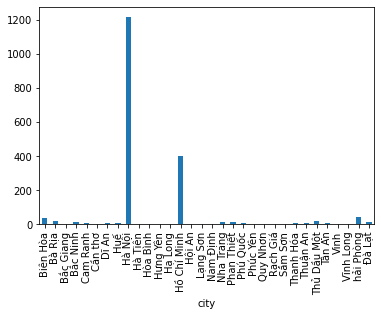

In [15]:
city_count = df.groupby('city').size()
city_count.plot(kind='bar')
city_count

In [40]:
df

,level_0,index,Date,địa chỉ,mặt tiền,đường vào,số tầng,số phòng ngủ,số phòng toilet,m^2,price,city
0,0,3,2021-09-10,"Dự án Vinhomes Ocean Park Gia Lâm, Đường Ngọc ...",5.0,40.0,5.0,5.0,5.0,67.5,214.8,Hà Nội
1,2,6,2021-08-10,"Dự án Izumi City, Biên Hòa, Đồng Nai",8.0,60.0,3.0,4.0,4.0,117.0,51.3,Biên Hòa
2,3,8,2021-08-10,"Dự án Vinhomes Ocean Park Gia Lâm, Gia Lâm, Hà...",6.0,52.0,4.0,3.0,3.0,135.0,74.1,Hà Nội
3,4,10,2021-08-10,"Ngõ 1 ngách 22 số 28, Đường Bùi Xương Trạch, P...",3.5,2.0,3.0,3.0,2.0,34.0,79.4,Hà Nội
4,5,11,2021-08-10,"34 ngõ 637 Phố Trương Định, Phường Thịnh Liệt,...",3.5,3.0,5.0,3.0,4.0,35.0,94.3,Hà Nội
...,...,...,...,...,...,...,...,...,...,...,...,...
1836,1914,3356,2021-09-10,"Đường Định Công Thượng, Phường Định Công, Hoàn...",4.0,3.0,4.0,4.0,3.0,47.0,63.4,Hà Nội
1837,1915,3359,2021-09-10,"Phố Khúc Thừa Dụ, Phường Dịch Vọng, Cầu Giấy, ...",3.5,3.2,5.0,5.0,4.0,42.0,114.3,Hà Nội
1838,1916,3361,2021-09-10,"Đường Hà Trì 2, Phường Hà Cầu, Hà Đông, Hà Nội",3.9,2.5,5.0,3.0,3.0,32.0,83.1,Hà Nội
1839,1917,3362,2021-09-10,"Đường Thạnh Lộc 29, Phường Thạnh Lộc, Quận 12,...",4.0,8.0,4.0,4.0,5.0,68.0,69.1,Hồ Chí Minh


In [43]:
#Compare price between city

lst = ['Hà Nội', 'Hồ Chí Minh']
hn_data = df[df['city']=='Hà Nội'].drop(['index', 'level_0'], axis = 1).reset_index()
hcm_data = df[df['city']=='Hồ Chí Minh'].drop(['index', 'level_0'], axis = 1).reset_index()
other_data = df[~df['city'].isin(lst)].drop(['index', 'level_0'], axis = 1).reset_index()

def transform(df):
  new_df = df
  new_df = new_df.drop(['Date', 'city', 'index', 'địa chỉ'], axis = 1).reset_index().drop('index', axis = 1)  
  dic_name = {"mặt tiền" : "front", "đường vào": "roadwidth", "số tầng" : "floors", "số phòng ngủ": "bedrooms",
              "số phòng toilet" : "bathrooms", "m^2" : "area"}
  final_df = new_df.rename(columns=dic_name)
  
  return final_df

hn_clean = transform(hn_data)
hcm_clean = transform(hcm_data)
other_clean = transform(other_data)
other_clean = other_clean.drop(int(other_data[other_data['price'] == other_data['price'].max()].index[0]))

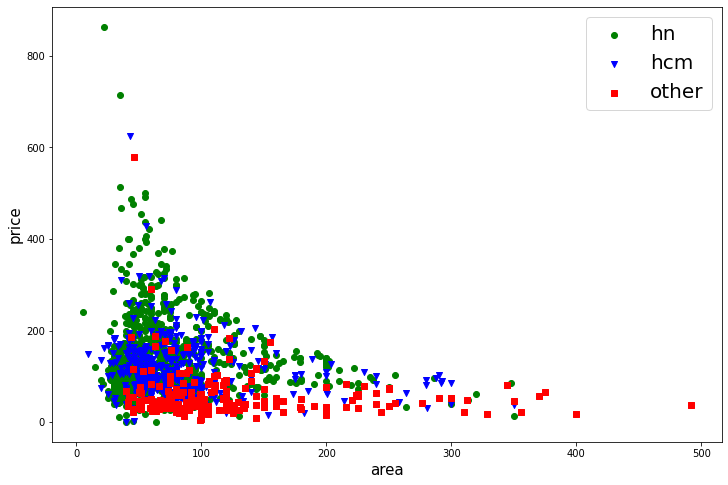

In [45]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)

ax1.scatter(hn_clean['area'], hn_clean['price'], c='g', marker='o', label = 'hn')
ax1.scatter(hcm_clean['area'], hcm_clean['price'], c='b', marker='v', label = 'hcm')
ax1.scatter(other_clean['area'], other_clean['price'], c='r', marker='s', label = 'other')
plt.legend(loc='upper right', fontsize=20)
plt.xlabel('area', size = 15)
plt.ylabel('price', size = 15)
plt.show()

In [16]:
dataframe = df[df['city'] == 'Hà Nội']

In [17]:
listColumn=dataframe.columns
dataframe =dataframe[listColumn[2::]].reset_index()

In [18]:
listQuan = pd.read_csv('/content/LinearRegression-Module/HaNoi quan - Sheet1.csv')
danhSachQuan = listQuan['Tên gọi'].tolist()

In [19]:
def checkLocateInCity(listCity,locate,listQuan): 
  check = 0
  for city in listCity:
    if city.lower() in locate.strip().lower():
      return city

In [20]:
for i in range(len(dataframe)):
  locate = dataframe['địa chỉ'][i]
  city = checkLocateInCity(danhSachQuan,locate,listQuan)
  if city is not 0:
    try:
      dataframe['locate'][i] = city
    except:
      dataframe['locate']=""
      dataframe['locate'][i] = city  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [21]:
dataframe = dataframe.dropna()
dataframe

,index,Date,địa chỉ,mặt tiền,đường vào,số tầng,số phòng ngủ,số phòng toilet,m^2,price,city,locate
0,0,2021-09-10,"Dự án Vinhomes Ocean Park Gia Lâm, Đường Ngọc ...",5.0,40.0,5.0,5.0,5.0,67.5,214.8,Hà Nội,Gia Lâm
1,2,2021-08-10,"Dự án Vinhomes Ocean Park Gia Lâm, Gia Lâm, Hà...",6.0,52.0,4.0,3.0,3.0,135.0,74.1,Hà Nội,Gia Lâm
2,3,2021-08-10,"Ngõ 1 ngách 22 số 28, Đường Bùi Xương Trạch, P...",3.5,2.0,3.0,3.0,2.0,34.0,79.4,Hà Nội,Thanh Xuân
3,4,2021-08-10,"34 ngõ 637 Phố Trương Định, Phường Thịnh Liệt,...",3.5,3.0,5.0,3.0,4.0,35.0,94.3,Hà Nội,Hoàng Mai
4,6,2021-08-10,"Dự án Vinhomes Green Bay Mễ Trì, Đường Hoàng L...",7.5,13.0,4.0,4.0,5.0,93.5,278.1,Hà Nội,Nam Từ Liêm
...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1835,2021-09-10,"Đường Định Công, Phường Định Công, Hoàng Mai, ...",5.0,4.0,2.0,2.0,2.0,80.0,65.0,Hà Nội,Hoàng Mai
1212,1836,2021-09-10,"Đường Định Công Thượng, Phường Định Công, Hoàn...",4.0,3.0,4.0,4.0,3.0,47.0,63.4,Hà Nội,Hoàng Mai
1213,1837,2021-09-10,"Phố Khúc Thừa Dụ, Phường Dịch Vọng, Cầu Giấy, ...",3.5,3.2,5.0,5.0,4.0,42.0,114.3,Hà Nội,Cầu Giấy
1214,1838,2021-09-10,"Đường Hà Trì 2, Phường Hà Cầu, Hà Đông, Hà Nội",3.9,2.5,5.0,3.0,3.0,32.0,83.1,Hà Nội,Hà Đông


,count,mean,STD
locate,,,
Quốc Oai,1,45.000000,NaN
Sơn Tây,1,33.300000,NaN
Chương Mỹ,2,20.800000,8.202439
Thạch Thất,3,29.100000,13.286459
Hoàn Kiếm,4,531.150000,316.089149
Đan Phượng,5,66.180000,9.266175
Đông Anh,6,50.555000,17.479638
Thanh Oai,13,54.453846,25.768056
Gia Lâm,17,131.050000,53.840261


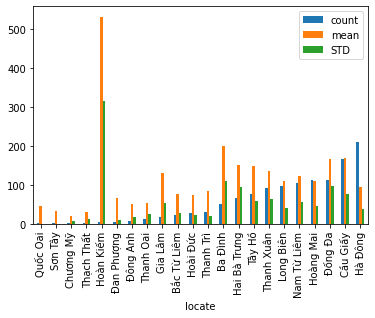

In [22]:
count=dataframe.groupby('locate').size().rename('count')
mean= dataframe.groupby('locate').mean()['price'].rename('mean')
var = dataframe.groupby('locate').std()['price'].rename('STD')

# des =pd.merge(pd.merge(count,mean,on='locate'),var,on='locate')

des=pd.concat([count, mean,var], axis=1)
des=des.sort_values(by='count')
des.plot(kind="bar")
des

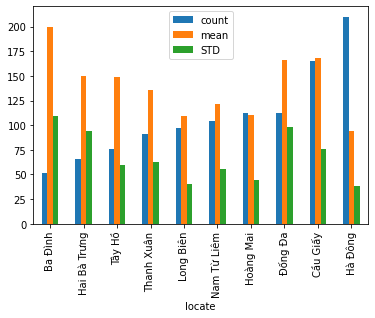

In [23]:
des[des['count'] >50].plot(kind='bar')

In [24]:
chose_locate=list(des[des['count'] >50].index)


In [76]:
dataUse= dataframe[dataframe['locate'].isin(chose_locate)]
dataUse

,index,Date,địa chỉ,mặt tiền,đường vào,số tầng,số phòng ngủ,số phòng toilet,m^2,price,city,locate
2,3,2021-08-10,"Ngõ 1 ngách 22 số 28, Đường Bùi Xương Trạch, P...",3.5,2.0,3.0,3.0,2.0,34.0,79.4,Hà Nội,Thanh Xuân
3,4,2021-08-10,"34 ngõ 637 Phố Trương Định, Phường Thịnh Liệt,...",3.5,3.0,5.0,3.0,4.0,35.0,94.3,Hà Nội,Hoàng Mai
4,6,2021-08-10,"Dự án Vinhomes Green Bay Mễ Trì, Đường Hoàng L...",7.5,13.0,4.0,4.0,5.0,93.5,278.1,Hà Nội,Nam Từ Liêm
5,9,2021-07-10,"Đường Nguyễn Khang, Phường Yên Hòa, Cầu Giấy, ...",6.5,5.0,7.0,5.0,5.0,53.0,292.5,Hà Nội,Cầu Giấy
6,11,2021-06-10,"Đường Lê Trọng Tấn, Phường Dương Nội, Hà Đông,...",5.0,3.0,3.0,4.0,3.0,33.0,40.9,Hà Nội,Hà Đông
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,1833,2021-09-10,"Đường Tư Đình, Phường Long Biên, Long Biên, Hà...",3.8,2.4,3.0,3.0,3.0,56.0,60.4,Hà Nội,Long Biên
1211,1835,2021-09-10,"Đường Định Công, Phường Định Công, Hoàng Mai, ...",5.0,4.0,2.0,2.0,2.0,80.0,65.0,Hà Nội,Hoàng Mai
1212,1836,2021-09-10,"Đường Định Công Thượng, Phường Định Công, Hoàn...",4.0,3.0,4.0,4.0,3.0,47.0,63.4,Hà Nội,Hoàng Mai
1213,1837,2021-09-10,"Phố Khúc Thừa Dụ, Phường Dịch Vọng, Cầu Giấy, ...",3.5,3.2,5.0,5.0,4.0,42.0,114.3,Hà Nội,Cầu Giấy


In [77]:
# module chuyển đổi địa chỉ thành trọng số dựa trên mean price 
def module_changeData(df,CATEGORICAL_COLUMNS):
    df2 = df.copy()
   #  Modify Data to number to use
    for feature_name in CATEGORICAL_COLUMNS:
        lst= list(dict(df.groupby(feature_name).mean().sort_values('price')['price']).keys()) # lấy những giá trị duy nhất
        Dct={feature_name:lst,str(feature_name+"ID"):[int(i) for i in range(1,len(lst)+1)]} # Tạo từ điển với feature_name làm khóa và index làm giá trị
        DF=pd.DataFrame.from_dict(Dct)
        df2=pd.merge(df2,DF,on=feature_name) # join 2 bảng lại với nhau
    # df2 = df2[[column for column in df2 if df2[column].dtype != "object"]]
    return df2

In [78]:
CATEGORICAL_COLUMNS=['locate']
dataUse =  module_changeData(dataUse,CATEGORICAL_COLUMNS)

In [79]:
dataUse.sort_values('locateID')

,index,Date,địa chỉ,mặt tiền,đường vào,số tầng,số phòng ngủ,số phòng toilet,m^2,price,city,locate,locateID
542,679,2021-05-10,"Đường Lê Hồng Phong, Phường Hà Cầu, Hà Đông, H...",5.0,2.5,5.0,3.0,4.0,42.0,70.2,Hà Nội,Hà Đông,1
606,1150,2021-02-10,"Đường Quang Trung, Phường Đồng Mai, Hà Đông, H...",4.0,3.0,4.0,3.0,3.0,33.0,46.4,Hà Nội,Hà Đông,1
607,1158,2021-09-10,"Đường Mậu Lương, Phường Kiến Hưng, Hà Đông, Hà...",4.5,6.0,5.0,3.0,4.0,35.0,85.7,Hà Nội,Hà Đông,1
608,1204,2021-09-10,"Đường Mậu Lương, Phường Kiến Hưng, Hà Đông, Hà...",5.0,30.0,5.0,3.0,4.0,33.0,71.2,Hà Nội,Hà Đông,1
609,1216,2021-09-10,"Đường Văn Khê, Phường Phú La, Hà Đông, Hà Nội",4.5,42.0,5.0,4.0,9.0,90.0,155.6,Hà Nội,Hà Đông,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1224,2021-09-10,"Đường Vĩnh Phúc, Phường Vĩnh Phúc, Ba Đình, ...",6.0,2.5,5.0,4.0,3.0,42.0,128.6,Hà Nội,Ba Đình,10
820,1355,2021-09-10,"Phường Đội Cấn, Ba Đình, Hà Nội",4.6,2.0,6.0,3.0,6.0,30.0,143.3,Hà Nội,Ba Đình,10
821,1451,2021-09-10,"Đường Nguyễn Thái Học, Phường Giảng Võ, Ba Đ...",5.5,30.0,3.0,3.0,3.0,55.0,500.0,Hà Nội,Ba Đình,10
809,780,2021-09-10,"Đường Vĩnh Phúc, Phường Vĩnh Phúc, Ba Đình, ...",3.5,3.5,3.0,3.0,3.0,35.0,108.6,Hà Nội,Ba Đình,10


In [80]:
dataUse.columns

Index(['index', 'Date', 'địa chỉ', 'mặt tiền', 'đường vào', 'số tầng',
       'số phòng  ngủ', 'số phòng toilet', 'm^2', 'price', 'city', 'locate',
       'locateID'],
      dtype='object')

In [81]:
dic_name = {"mặt tiền" : "front", "đường vào": "roadwidth", "số tầng" : "floors", "số phòng  ngủ": "bedrooms",
              "số phòng toilet" : "bathrooms", "m^2" : "area"}
dataUse = dataUse.rename(columns = dic_name)

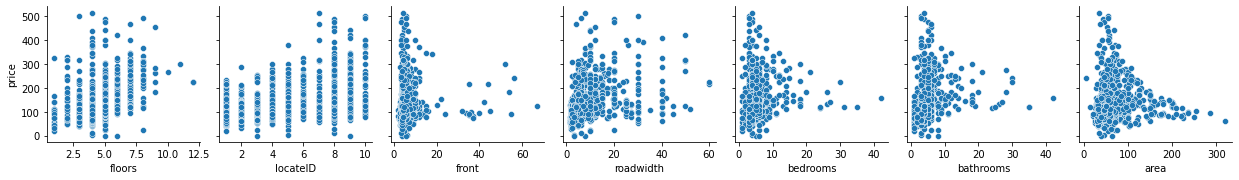

In [82]:
sns.pairplot(x_vars=['floors','locateID','front','roadwidth','bedrooms','bathrooms','area'],y_vars=['price'],data=dataUse)

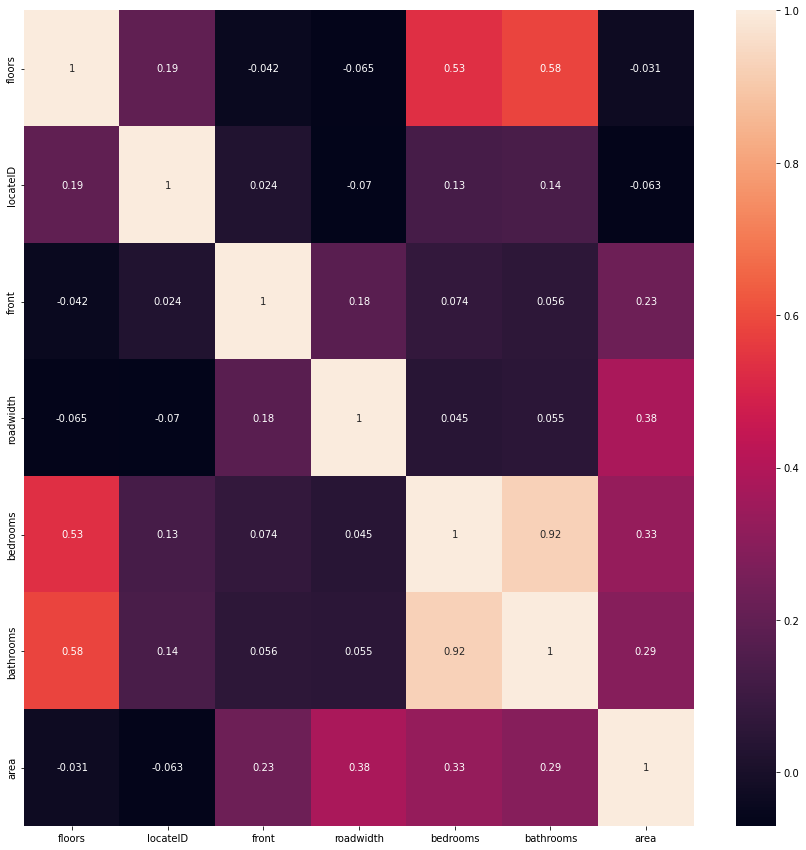

In [83]:
# df1 = df.loc[:, df.columns != col]
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(dataUse[['floors','locateID','front','roadwidth','bedrooms','bathrooms','area']].corr(), annot=True)

In [84]:
corr_Matrix = dataUse[['floors','locateID','front','roadwidth','bedrooms','bathrooms','area','price']].corr()
listFeature = list(corr_Matrix.nlargest(6, 'price')['price'].index)
listFeature

['price', 'locateID', 'roadwidth', 'floors', 'bathrooms', 'bedrooms']

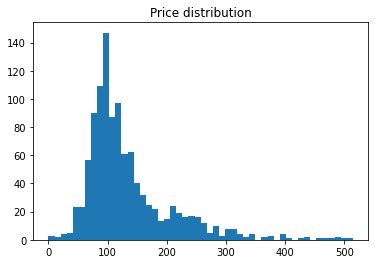

In [85]:
#lọc thêm outline
plt.hist(dataUse['price'], bins=50)
plt.title('Price distribution')
plt.show()
#

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


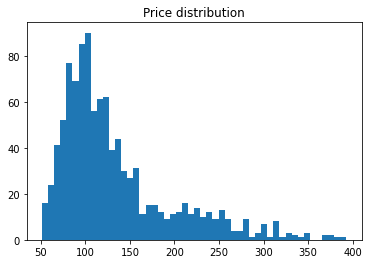

In [86]:
dataUse = dataUse[dataUse['price'] < 400][dataUse['price'] > 50]

plt.hist(dataUse['price'], bins=50)
plt.title('Price distribution')
plt.show()

In [87]:
dataUse = dataUse[listFeature]
dataUse.head()

,price,locateID,roadwidth,floors,bathrooms,bedrooms
0,79.4,5,2.0,3.0,2.0,3.0
1,300.0,5,15.0,8.0,8.0,6.0
2,278.6,5,18.0,8.0,9.0,9.0
3,143.4,5,6.0,5.0,5.0,5.0
5,181.8,5,10.0,7.0,12.0,14.0


# Train,Test Data

In [88]:
import random as rd
y_train = dataUse['price'].to_numpy()

xData=dataUse.drop(columns=['price'])
x_train =xData.to_numpy()
x_test = []
y_test = []

#Split data to train set and test set
for i in range(int(x_train.shape[0] * 0.2)):
  id = rd.randint(0, x_train.shape[0]-1)
  x_test.append(x_train[id])
  y_test.append(y_train[id])

  x_train = np.delete(x_train, id, axis = 0)
  y_train = np.delete(y_train, id)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = np.vstack((np.ones(x_test.shape[0], ),x_test.T)).T
x_train = np.vstack((np.ones(x_train.shape[0], ), x_train.T)).T

In [96]:
x_test

array([[ 1.,  9.,  5.,  4.,  4.,  3.],
       [ 1.,  8.,  3.,  2.,  2.,  2.],
       [ 1.,  9.,  4.,  5.,  5.,  4.],
       ...,
       [ 1.,  4.,  4.,  5.,  4.,  3.],
       [ 1.,  3., 15.,  3.,  5.,  5.],
       [ 1.,  8.,  4.,  6.,  5.,  5.]])

In [89]:
print("Size of train",len(x_train))
print("Size of Test",len(x_test))

Size of train 829
Size of Test 207


# Build Linear Module

In [90]:

# Error class
class error(): 
  def __init__(self, y_true, y_pre):
    self.y_true = y_true
    self.y_pre = y_pre
    self.len = len(y_true)

  def mean_abs_err(self):
    return np.sum(np.abs(self.y_true - self.y_pre)) / self.len

  def max_err(self):
    return np.max(self.y_true - self.y_pre)

  def r2_score(self):
    u = (self.y_true - self.y_pre) ** 2
    v = (self.y_true - np.average(self.y_true)) ** 2
    return np.average(1 - (u.sum(axis=0) / v.sum(axis=0)))

  def explain_cor(self):
    y_diff_avg = np.average(self.y_true - self.y_pre, axis=0)
    u = np.average((self.y_true - self.y_pre - y_diff_avg) ** 2, axis=0)

    y_true_avg = np.average(self.y_true, axis=0)
    v = np.average((self.y_true - y_true_avg) ** 2, axis=0)

    return np.average(1 - (u.sum(axis=0) / v.sum(axis=0)))
from sklearn.metrics import r2_score

In [151]:
class Linear_regression():
  def __init__(self, iter, lr,landa=0):
    self.iter = iter
    self.lr = lr
    self.landa =landa
    self.hist = {"lossTrain":[],"lossTest":[],"accuTrain":[],"accuTest":[]}
  
  def update_weight(self, w):
    m = len(self.X)
    predictions = np.dot(self.X, w)
    error = self.y - predictions
    gradient = np.dot(-self.X.T,  error)
    gradient /= m
    gradient *= self.lr
    gradient += ((self.landa * w)/m)
    w -= gradient
    return w

  def cost_function(self,X,y):
    N = len(y)
    pred = np.dot(X, self.weights)
    sq_error = (pred - y)**2
    p =self.landa *(np.power(self.weights,2).sum())
    return 1.0/(2*N) * sq_error.sum() + (p/2*N) 

  def fit(self, Xc, yc,testData=None):
    self.X = Xc
    self.weights = np.zeros((Xc.shape[1], 1))
    self.y = yc.reshape(yc.shape[0], 1)
    for i in range(self.iter):
      loss = self.cost_function(self.X,self.y)
      if(i > 0):
        if((loss - self.hist["lossTrain"][-1] ) > 1):
          break

      self.hist["lossTrain"].append(loss)
      self.hist["accuTrain"].append(self.score(self.y, np.dot(self.X,self.weights)))
      if testData is not None:
        x_test,y_test = testData
        self.hist["lossTest"].append(self.cost_function(x_test,y_test))
        self.hist["accuTest"].append(self.score(y_test, np.dot(x_test,self.weights)))
      self.weights = self.update_weight(self.weights)

    return self.weights

  def lrtrain(self, df):
    self.preprocessing_data(df)
    return self.fit(self.x_train, self.y_train)

  def score(self,y_true,y_pre):
    u = (y_true - y_pre) ** 2
    v = (y_true - np.average(y_true)) ** 2
    r=np.corrcoef(y_pre,y_true, rowvar=False)[0][1]
    return np.average(1 - (u.sum(axis=0) / v.sum(axis=0)))
    # return r

In [92]:
dataUse.drop(columns=['price']).columns

Index(['locateID', 'roadwidth', 'floors', 'bathrooms', 'bedrooms'], dtype='object')

In [156]:
epoch = 10000
model = Linear_regression(epoch, 0.003,0.01)
weights = model.fit(x_train,y_train,testData=(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [98]:
label = xData.columns.to_list()
labels = ['weight'] + label
labels

['weight', 'locateID', 'roadwidth', 'floors', 'bathrooms', 'bedrooms']

In [155]:
coeff_df = pd.DataFrame(weights, labels ,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
ranked_suburbs

,Coefficient
locateID,9.005178
floors,7.886051
roadwidth,3.652812
bathrooms,2.057813
bedrooms,1.837458
weight,1.562468


[[1.         0.67435542]
 [0.67435542 1.        ]]


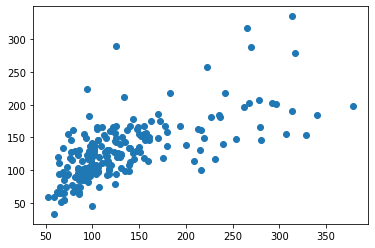

In [154]:
predictions = np.dot(x_test,weights)
y_test = np.reshape(y_test,(len(y_test),1))
print(np.corrcoef(predictions,y_test, rowvar=False))
plt.scatter(y_test, predictions)


# Visualize accuracy

In [105]:
from sklearn.linear_model import LinearRegression as lrs

sk_lr = lrs() 
skmodel = sk_lr.fit(x_train, y_train)
skmodel.score(x_test, y_test)

0.47183576832335106

In [152]:
x_test_10_samples =  x_test[:10]
y_pre_ourmodel = np.dot(x_test_10_samples, weights)
y_pre_skmodel = np.dot(x_test_10_samples.reshape(10,6), skmodel.singular_.reshape(skmodel.singular_.size, 1))


In [157]:
data_compare = np.concatenate((y_test[0:10], y_pre_ourmodel, y_pre_skmodel), axis = 1)
data_compare

array([[ 280.        ,  146.16096085, 2188.09111296],
       [ 104.2       ,  108.1249728 , 1758.29695793],
       [ 112.        ,  154.28947097, 2160.78695864],
       [ 139.        ,  133.28261581, 1932.79299058],
       [  64.6       ,   93.96734949, 1329.35677639],
       [ 139.7       ,  134.64444128, 2349.76799031],
       [  92.2       ,  103.31049675, 1391.46358271],
       [ 118.        ,  131.28682101, 1650.40420725],
       [ 115.79      ,  122.31317617, 1841.49038112],
       [ 235.3       ,  183.51196571, 2843.34710712]])

In [114]:
# thêm bảng so sánh với thư viện 
df_compare = pd.DataFrame(data_compare, columns=['y_true', 'y_pre_ourmodel', 'y_pre_skmodel'])
df_compare.head(10)
###################################

,y_true,y_pre_ourmodel,y_pre_skmodel
0,280.00,149.630910,2188.091113
1,104.20,102.849250,1758.296958
2,112.00,161.637661,2160.786959
3,139.00,133.968506,1932.792991
4,64.60,98.301475,1329.356776
5,139.70,127.438826,2349.767990
6,92.20,119.159454,1391.463583
7,118.00,145.073987,1650.404207
8,115.79,126.577543,1841.490381
9,235.30,186.061631,2843.347107


In [158]:
hist = model.hist
# history of Score
scoreTrain = hist['accuTrain']
scoreTest = hist['accuTest']

# history of Loss
lossTrain = hist['lossTrain']
lossTest = hist['lossTest']

inter = len(lossTrain)


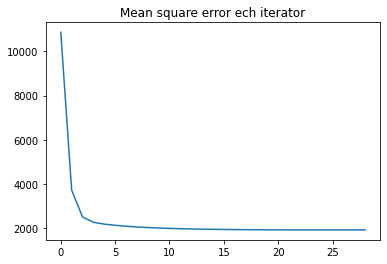

In [159]:
plt.plot(range(inter), lossTrain)
plt.title('Mean square error ech iterator')
plt.show()

<Figure size 432x288 with 0 Axes>

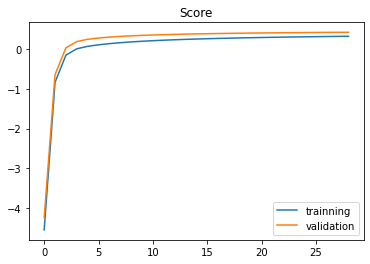

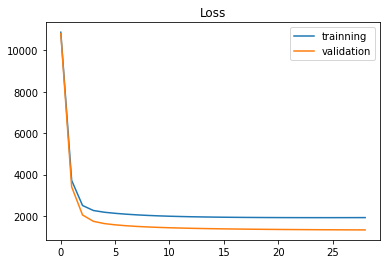

<Figure size 432x288 with 0 Axes>

In [160]:
#score
plt.title("Score")
plt.plot(range(inter),scoreTrain)
plt.plot(range(inter),scoreTest)
plt.legend(["trainning","validation"])
# plt.ylim([0.25,0.5])
plt.figure()

#Loss
plt.title("Loss")
plt.plot(range(inter),lossTrain)
plt.plot(range(inter),lossTest)
# plt.ylim([0,4000])
plt.legend(["trainning","validation"])
plt.figure()